# Housing Renovation Analysis

<img src="images/housing.jpg" alt="Drawing" style="width: 1000px;height:300px;float: left;"/>

## Overview
This project uses linear regression analysis to infer how certain variables impact housing prices and by how much. Analysis of data from King County House Sales shows that house condition, grade, and bathroom number are three key features that can increase a house's price. Any home seller can use this information to make decisions on potential renovations. 

## Business Problem
A real estate agency is looking to guide homeowners who looking to sell their houses. They want to provied these homeowners with anlaysis of how renovations may impact the price of their home.

## Data Understanding
This project uses data from the King County House Sales dataset. It includes information on house age, size, condition and other features.

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [303]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [305]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

## Data Preparation

### Data Cleaning
Drop irrelevant columns, address missing values and manipulate data into desired forms

In [306]:
#drop irrelevant columns
df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated', 'view'], axis=1, inplace=True)

In [307]:
#fill in missing sqft_basement values
df.loc[df.sqft_basement == '?', 'sqft_basement'] = (df[df.sqft_basement == '?'].sqft_living
                               - df[df.sqft_basement == '?'].sqft_above)

#convert into numeric
df['sqft_basement'] = df.sqft_basement.astype('float64')

#convert into categorical variable
df['is_basement'] = df.sqft_basement.map(lambda x: 0 if x == 0 else 1)
df.drop('sqft_basement', axis=1, inplace=True)

In [308]:
#convert condition and grade into numeric values
df['condition'] = df.condition.map(lambda x: 1 if x=='Poor' 
                                   else (2 if x=='Fair'
                                    else (3 if x=='Average'
                                    else  (4 if x=='Good' else 4))))

df['grade'] = df.grade.map(lambda x: int(x[0:2]))

In [309]:
df.waterfront.isna().sum()

2376

In [310]:
categoricals = ['waterfront']

In [311]:
dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)

In [312]:
df.drop(categoricals, axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

### Log Transformation

In [313]:
#continuous variables
cont_data = df.loc[:, ((df.dtypes != 'object') & (df.nunique() > 20))]

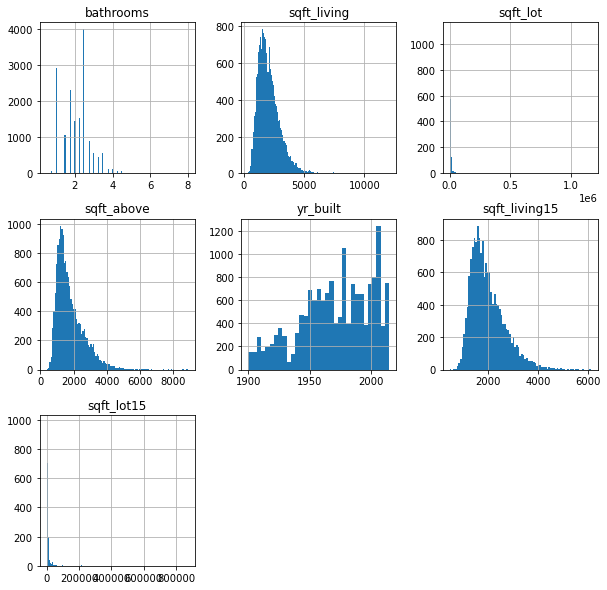

In [108]:
cont_data.hist(bins='auto', figsize=(10,10));

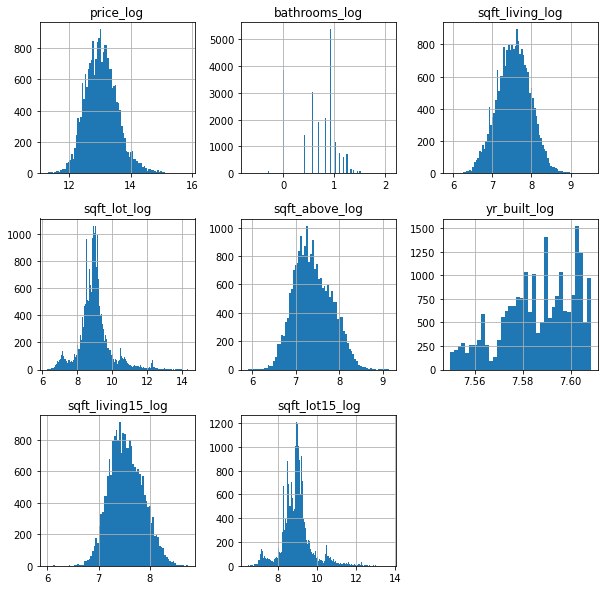

In [314]:
#log transforms of continuous variables
log_names = [f'{column}_log' for column in cont_data.columns]

cont_log = np.log(cont_data);
cont_log.columns = log_names;
cont_log.hist(figsize=(10, 10), bins='auto');

In [315]:
cont_data.drop(['bathrooms', 'yr_built'], axis=1, inplace=True)
cont_log.drop(['bathrooms_log', 'yr_built_log'], axis=1, inplace=True)

C:\Users\bento\anaconda3.0\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [316]:
log_transforms = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15',
       'sqft_lot15']

In [317]:
#replace continuous variables with log transforms
df.drop(cont_data.columns, axis=1, inplace=True)
df = pd.concat([df, cont_log],  axis=1)

### Split Data

In [318]:
X = df.drop('price_log', axis=1)
y = df.price_log

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Feature Scaling

In [320]:
#X_train
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train.drop('waterfront_YES', axis=1))
data_std = std_scale.transform(X_train.drop('waterfront_YES', axis=1))
data_std = pd.DataFrame(data_std, columns=X_train.drop('waterfront_YES', axis=1).columns,
                       index=X_train.index)

In [321]:
X_train = pd.concat([data_std, X_train.waterfront_YES], axis=1)

In [322]:
#X_test
std_scale = preprocessing.StandardScaler().fit(X_test.drop('waterfront_YES', axis=1))
data_std = std_scale.transform(X_test.drop('waterfront_YES', axis=1))
data_std = pd.DataFrame(data_std, columns=X_test.drop('waterfront_YES', axis=1).columns,
                       index=X_test.index)

In [323]:
X_test = pd.concat([data_std, X_test.waterfront_YES],  axis=1)

## Linear Regression Modeling

### Baseline Model

In [324]:
#determine highest correlating feature with price
df.corr().price_log.sort_values(ascending=False)

price_log            1.000000
grade                0.703720
sqft_living_log      0.674802
sqft_living15_log    0.607154
sqft_above_log       0.586013
bathrooms            0.551249
bedrooms             0.343360
floors               0.310630
is_basement          0.212177
waterfront_YES       0.170720
sqft_lot_log         0.138261
sqft_lot15_log       0.123710
yr_built             0.080583
condition            0.017863
Name: price_log, dtype: float64

In [325]:
baseline_model = LinearRegression()

In [326]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['grade']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49515834929445113
Validation score: 0.49579438583700036


### Second Model
Use p significance to choose features

In [327]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

C:\Users\bento\anaconda3.0\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [328]:
model.pvalues > 0.05

const                False
bedrooms             False
bathrooms            False
floors               False
condition            False
grade                False
yr_built             False
is_basement          False
sqft_living_log      False
sqft_lot_log          True
sqft_above_log       False
sqft_living15_log    False
sqft_lot15_log       False
waterfront_YES       False
dtype: bool

In [329]:
#all but sqft_lot_log were significant

In [330]:
second_model = LinearRegression()

In [331]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train.drop('sqft_lot_log', axis=1),
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6609592500745328
Validation score: 0.6586601072425464


## Third Model
Use sklearn feature selection

In [332]:
from sklearn.feature_selection import RFECV

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
floors: True
condition: True
grade: True
yr_built: True
is_basement: True
sqft_living_log: True
sqft_lot_log: False
sqft_above_log: True
sqft_living15_log: True
sqft_lot15_log: True
waterfront_YES: True


In [333]:
#same result as second model

### Final Model

In [432]:
X_train_final = X_train.drop(['sqft_lot_log', 'sqft_living_log'], axis=1)
X_test_final = X_test.drop(['sqft_lot_log', 'sqft_living_log'], axis=1)

In [425]:
['sqft_lot_log', 'sqft_living15_log', 'sqft_above_log']

['sqft_lot_log', 'sqft_living15_log', 'sqft_above_log']

In [433]:
final_model = LinearRegression()

In [434]:
final_model.fit(X_train_final, y_train)

LinearRegression()

In [428]:
final_model.score(X_test_final, y_test)

0.6557697093791379

In [435]:
sm.OLS(y_train, sm.add_constant(X_train_final)).fit().summary()

C:\Users\bento\anaconda3.0\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2839.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:29:16   Log-Likelihood:                -3845.6
No. Observations:               16197   AIC:                             7715.
Df Residuals:                   16185   BIC:                             7808.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0421      0.002   5389.110      0.000      13.037      13.047
bedrooms             -0.0255      0.003     -8.230      0.000      -0.032      -0.019
bathrooms             0.0684      0.004     15.962      0.000       0.060       0.077
floors                0.0358      0.004      9.886      0.000       0.029       0.043
condition             0.0243      0.003      9.322      0.000       0.019       0.029
grade                 0.2515      0.004     60.321      0.000       0.243       0.260
yr_built             -0.1754      0.003    -55.551      0.000      -0.182      -0.169
is_basement           0.0825      0.003     25.916      0.000       0.076       0.089
sqft_above_log        0.1048      0.006     18.551      0.000       0.094       0.116
sqft_living15_log     0.1005      0.004     25.536      0.000       0.093       0.108
sqft_lot15_log       -0.0402      0.003    -13.478      0.000      -0.046      -0.034
waterfront_YES        0.5526      0.030     18.614      0.000       0.494       0.611
==============================================================================
Omnibus:                       41.750   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.754
Skew:                          -0.048   Prob(JB):                     9.53e-12
Kurtosis:                       3.257   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
sm.OLS(y_train, sm.add_constant(X_train_final)).fit().summary()

C:\Users\bento\anaconda3.0\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2624.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:28:00   Log-Likelihood:                -3801.3
No. Observations:               16197   AIC:                             7629.
Df Residuals:                   16184   BIC:                             7729.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0422      0.002   5403.712      0.000      13.037      13.047
bedrooms             -0.0325      0.003    -10.236      0.000      -0.039      -0.026
bathrooms             0.0616      0.004     14.214      0.000       0.053       0.070
floors                0.0411      0.004     11.247      0.000       0.034       0.048
condition             0.0223      0.003      8.535      0.000       0.017       0.027
grade                 0.2499      0.004     60.053      0.000       0.242       0.258
yr_built             -0.1750      0.003    -55.539      0.000      -0.181      -0.169
is_basement           0.0451      0.005      8.870      0.000       0.035       0.055
sqft_living_log       0.0994      0.011      9.423      0.000       0.079       0.120
sqft_above_log        0.0212      0.011      2.021      0.043       0.001       0.042
sqft_living15_log     0.0947      0.004     23.843      0.000       0.087       0.102
sqft_lot15_log       -0.0419      0.003    -14.061      0.000      -0.048      -0.036
waterfront_YES        0.5489      0.030     18.539      0.000       0.491       0.607
==============================================================================
Omnibus:                       43.200   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.430
Skew:                          -0.042   Prob(JB):                     2.50e-12
Kurtosis:                       3.268   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check for Linear Regression Assumptions

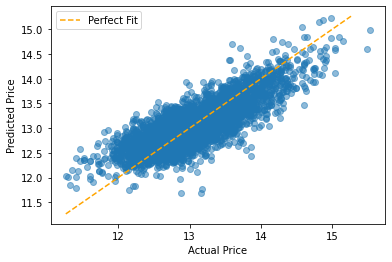

In [418]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

C:\Users\bento\anaconda3.0\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


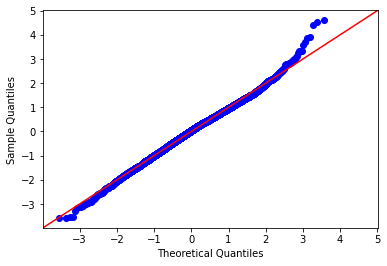

In [419]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

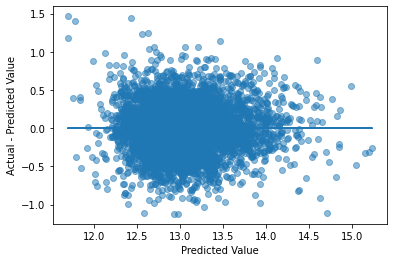

In [420]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms           1.741706
bathrooms          3.237968
floors             2.158127
condition          1.166450
grade              2.679211
yr_built           1.707508
is_basement        1.473944
sqft_living_log    4.918035
sqft_lot_log       1.532433
waterfront_YES     1.019558
Name: Variance Inflation Factor, dtype: float64

In [345]:
df2=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [397]:
df2[(df2.cc>.7) & (df2.cc <1)]

,cc
pairs,
"(sqft_lot_log, sqft_lot15_log)",0.918665
"(sqft_above_log, sqft_living_log)",0.864979
"(bathrooms, sqft_living_log)",0.762135
"(sqft_living15_log, sqft_living_log)",0.746836
"(sqft_living_log, grade)",0.743038
"(sqft_above_log, grade)",0.742869
"(sqft_living15_log, sqft_above_log)",0.713102
"(price_log, grade)",0.703720
